# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

## Откройте и изучите файл

In [136]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    
    


- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), в будущем пригодится )  



<div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    
    Я понял это так, разделение библиотек, отделение пробелом модулей, объединение, если что-то не так укажи, пожалуйста.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍 можно разделить пробелом. Но вообще пока исправлять особо нечего,  это на будущее




</div>


In [137]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [138]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [140]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


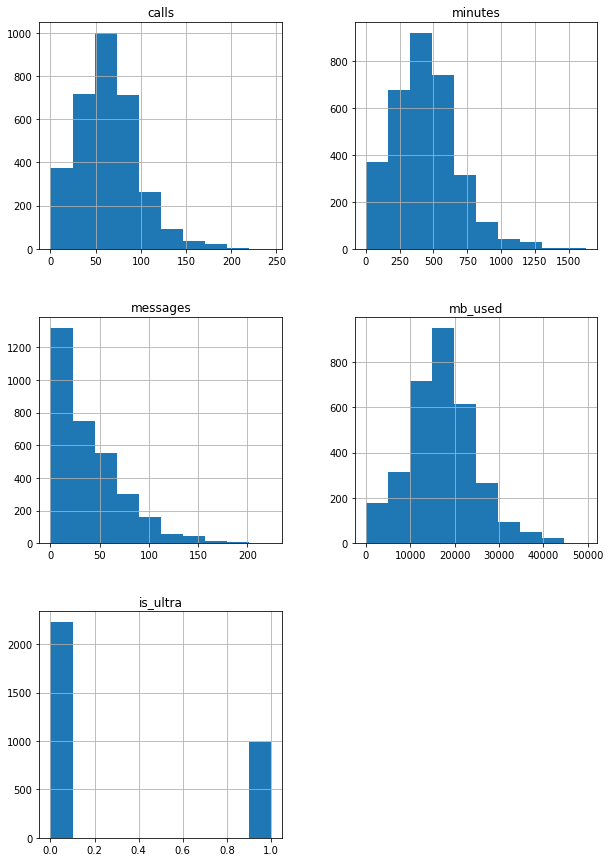

In [141]:
df.hist(grid=True, figsize=(10, 15))
...;

In [142]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


<font size="4"><b>Вывод</b></font>

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
В перой части проекта были импортированы все нужные библиотеки для удобства в одной ячейке.  
Так же изучены данные, данных не так много, нужно верно разделить их на тестовые и обучающие.  
За целевой признак возьмем столбец "is_ultra" - использование тарифа "Смарт"-0 или "Ультра"-1.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены.



<div class="alert alert-warning">



Совет: 


- .info (дает тебе информацию о пропусках и типах данных), а .describe (медианы, квантили, max, min итд) это такой джентльменский набор при первичной разведке данных (EDA).  



- Можно еще отдельно проверить датасет на сбалансированность классов в таргете. Это помогло бы решить бонусное задание сразу (Только не надо балансировать данные, это тема следующего проекта).




- Можно посмотреть корреляцию признаков. Знаешь что такое мультиколлинеарность, какие два типа проблем возникает, для каких моделей и какие варианты решения?




</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
    "Джентельменский набор" дополнен! Понял о чем ты говорил, данных о тарифе смарт в два раза больше чем об ультра. Насколько мне удалось прочитать Мультиколлинеарность это наличие линейной зависимости или близкой к ней между двумя переменными.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:
  
    
Принято
    
    

- Дисбаланс


Действительно есть дисбаланс. Как он может быть полезен для нашего проекта?! Как видишь нулей у нас 69% - это сразу решение бонусного задания. Именно accuracy 0,69 наша модель должна превзойти чтобы быть признанной адекватной



- Мультиколлинеарность


Она нас тоже присутствует, calls-minutes корреляция 0,98


    
Она вызывает ряд проблем, и от неё можно избавиться, а можно не избавляться потому что

- Первый момент: мультиколлинеарность проблема линейных моделей - могут переобучаться.... теоретически. Но в логистической, и в линейной регрессиях реализована регуляризация, которая решает проблему мультиколлинеарности признаков. "Деревянные" модели (RF, DT) устойчивы к мультиколлинеарности, а кластеризация тоже почти не зависит от линейных зависимостей. Получается, избавляться от мультиколлинеарности чтобы не переобучаться не обязательно )) 
    
    
- Второй момент: интерпретируемость линейной модели (мы по коеффициентам судим как признаки влияют на таргет), тут  мультиколлинеарность надо убирать.


Так что получается что в нашем случае убирать мультиколлинеарность имеет смысл только если мы захотим посмотреть как конкретно признаки влияют на Таргет



## Разбейте данные на выборки

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
Делить исходный датасет нужно на 3, потому что необходиму взять часть больше половины для обучения модели, и еще два набора данных для валидации и проверки на тестовой выборке. 
            В теории учили делить на 75/25, но тк нам нужно разделить на 3 части, разделим на 70/15/15.

In [143]:
df_train, df_valid__test = train_test_split(df, test_size=0.3, random_state=12345, stratify=df['is_ultra'])
df_valid, df_test = train_test_split(df_valid__test, test_size=0.5, random_state=12345, stratify=df_valid__test['is_ultra'])
target_valid = df_valid['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

<font size="4"><b>Вывод разделение данных на выборки</b></font>

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
Разделили датасет и для каждого отдельного набора данных присвоили целевой признак и признаки, по которым модель будет предсказывать целевой.   
            Размер тестовой выборки - 482;
            Размер валидационной выборки - 482;
            Размер обущающей выборки - 2250.



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет: 

    
- Классика - это тестовая и валидационная примерно одинаковые по размеру    
    

- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут




<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
    Переделал на 70/15/15. Интересно будет посмотреть, как может поменяться

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



В каком-то отдельном случае может даже ухудшиться,  ведь всегда присутствует Рандом. Но в большинстве случаев это приведёт к улучшению метрики




</div>


## Исследуйте модели

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
Найдем выборки с наивысшей долей правильных ответов, без гиперпараметров.

In [144]:
best_accuracy_valid_m1 = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=666666, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy_valid_m1 = model.score(features_valid, target_valid)
    if accuracy_valid_m1 > best_accuracy_valid_m1:
        best_accuracy_valid_m1 = accuracy_valid_m1
        best_depth = depth
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 
    
print("Best accuracy:", best_accuracy_valid_m1, "Best_depth:", best_depth)

max_depth = 1 : 0.7344398340248963
max_depth = 2 : 0.7904564315352697
max_depth = 3 : 0.8008298755186722
max_depth = 4 : 0.7800829875518672
max_depth = 5 : 0.8049792531120332
max_depth = 6 : 0.7966804979253111
max_depth = 7 : 0.8070539419087137
max_depth = 8 : 0.8091286307053942
max_depth = 9 : 0.7946058091286307
max_depth = 10 : 0.7883817427385892
max_depth = 11 : 0.7966804979253111
max_depth = 12 : 0.7717842323651453
max_depth = 13 : 0.7759336099585062
max_depth = 14 : 0.7551867219917012
max_depth = 15 : 0.7614107883817427
max_depth = 16 : 0.7593360995850622
max_depth = 17 : 0.7468879668049793
max_depth = 18 : 0.7344398340248963
max_depth = 19 : 0.7406639004149378
max_depth = 20 : 0.7531120331950207
max_depth = 21 : 0.7385892116182573
max_depth = 22 : 0.7551867219917012
max_depth = 23 : 0.7551867219917012
max_depth = 24 : 0.7551867219917012
max_depth = 25 : 0.7551867219917012
max_depth = 26 : 0.7551867219917012
max_depth = 27 : 0.7551867219917012
max_depth = 28 : 0.7551867219917012
m

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле




<div class="alert alert-warning">


Совет: 

- Можно добавить график, хорошо оформленный график украсит проект. Тут на графике можно посмотреть как при изменении max_depth меняется точность на train и validation датасете (для этого собираем наши метрики на валидации и train в списки, а затем по ним обычный plt.plot()) Такой способ используют чтобы лучше отследить переобучение, но для этого стоит взять пернебор по max_depth поглубже


- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 




</div>



In [145]:
best_est = 0
best_accuracy_valid_m2 = 0
for est in range(1, 200):
    model = RandomForestClassifier(random_state=666666, n_estimators=est)
    model.fit(features_train, target_train)
    accuracy_valid_m2 = model.score(features_valid, target_valid)
    if accuracy_valid_m2 > best_accuracy_valid_m2:
        best_accuracy_valid_m2 = accuracy_valid_m2
        best_est = est

print("Best accuracy:", best_accuracy_valid_m2, 'Best_est:', best_est)

Best accuracy: 0.8070539419087137 Best_est: 86



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет:


- Илья, можно было сделать похитрее, RF одна из лучших моделей в классическом machine-learning, поэтому можно было добавить перебор 2 гиперпараметров в двойном цикле, в результата метрика качества вырастет. 
 




- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить )) 
    
    Или tqdm, это ещё лучше, потому что он показывает интерактивно, на каком этапе расчетов мы находимся

    
    from tqdm import tqdm


    for n_estimators in tqdm(range(3,58)):

        ..........



(дальше мы будем уходить от неэффективных в питоне циклов к apply.  Там тоже есть аналог прогресс-баров:  .progress_apply)
    
И будет красиво )   
 





</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
    Это курс, с которого я познакомился с питоном, те до этого я не знал, что такое программирование, поэтому мне тяжело даются функции/циклы, когда вижу готовый понимаю, как работает, а сам додумать иногда многоуровневость не могу, можешь посоветовать материал к изучению, чтобы повысить свой уровень, потому что мне очень нравится, но практики не хватает.  
    Этот же комментарий к следующему совету подходит 😢

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Курсов по питону множество (stepic на ютубе много отличных курсов где понятно все обьясняют).  Но вот какой-то конкретный урок или видео где бы разбиралась тема циклов я не знаю. А просто кидать гагугленную ссылку...это ты и сам модешь. Попробуй погуглить "питон двойной цикл"


In [146]:
best_accuracy_valid_m3 = 0
for depth in range(1, 50):
    model = LogisticRegression(random_state=666666)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy_valid_m3 = model.score(features_valid, target_valid)
    if accuracy_valid_m3 > best_accuracy_valid_m3:
        best_accuracy_valid_m3 = accuracy_valid_m3
    
print("Best accuracy:", best_accuracy_valid_m3)

Best accuracy: 0.7053941908713693


<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
    Найдем выборки с наивысшей долей правильных ответов, с различными гиперпараметрами.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Это лучше делать "цикл в цикле", и результаты будут точнее, и код лаконичней


In [147]:
model = DecisionTreeClassifier(random_state=666666, max_depth=8, criterion='entropy')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid_m11 = model.score(features_valid, target_valid)
print("Accuracy:", accuracy_valid_m11)

Accuracy: 0.7821576763485477


In [148]:
model = RandomForestClassifier(random_state=666666, n_estimators=86, criterion='entropy')
model.fit(features_train, target_train)
accuracy_valid_m22 = model.score(features_valid, target_valid)
print("Accuracy:", accuracy_valid_m22)

Accuracy: 0.7966804979253111


Параметр criterion='entropy' показывает себя хуже, чем стандартный 'gini'

In [149]:
model = DecisionTreeClassifier(random_state=666666, max_depth=8, splitter='random')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid_m111 = model.score(features_valid, target_valid)
print("Accuracy:", accuracy_valid_m111)

Accuracy: 0.7759336099585062


Стандартый splitter='best' показывает себя лучше 'random'

In [150]:
model = RandomForestClassifier(random_state=666666, n_estimators=86, bootstrap=False)
model.fit(features_train, target_train)
accuracy_valid_m222 = model.score(features_valid, target_valid)
print("Accuracy:", accuracy_valid_m222)

Accuracy: 0.7800829875518672


Стандартный bootstrap=True показывает себя лучше чем False

In [151]:
model = RandomForestClassifier(random_state=666666, n_estimators=86, warm_start=True, oob_score=True)
model.fit(features_train, target_train)
accuracy_valid_m2222 = model.score(features_valid, target_valid)
print("Accuracy:", accuracy_valid_m2222)

Accuracy: 0.8070539419087137


При изменении параметров warm_start, oob_score доля правильных ответов не меняется 

In [152]:
model = LogisticRegression(random_state=666666, fit_intercept=False)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid_m3 = model.score(features_valid, target_valid)
    
print("Accuracy:", accuracy_valid_m3)

Accuracy: 0.7053941908713693


Модель показывает себя лучше, если fit_intercept изменить параметр на False. 

In [153]:
model = LogisticRegression(random_state=666666, warm_start=True)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
accuracy_valid_m33 = model.score(features_valid, target_valid)
    
print("Accuracy:", accuracy_valid_m33)

Accuracy: 0.7053941908713693


При изменении параметров warm_start модель показывает себя хуже

<font size="4"><b>Вывод исследование различных моделей</b></font>

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
            Лучше всего себя показала модель DecisionTreeClassifier с количество деревьев 19. Две остальные рассмотренные модели показали себя хуже.  
            Удовлетворяют начальному условию две модели RandomForestClassifier = 0.807, DecisionTreeClassifier=0.809.

            
            
            Все рассмотренные параметры были взяты с https://scikit-learn.org/stable/


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Все верно, RF лучший. 


<div class="alert alert-warning">


Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" (Логистическая регрессия) есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
    Попробую конечно. Переобучение, на train та же метрива увеличивалась, ведь чем больше глубина, тем точнее модель.  
    В интеренете удалось прочитать, что при RF используется большо количество деревьев.  
    Не знаю, есть ли парадокс, но модель LR ипользуется на решения бинарных задач, а у нас именно такая.  
    Подскажи🤷‍♂️

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Успех:


Дополню чуть

1. Верно, переобучение. На train точность растет вплоть до 100%. 
    
    
2. Да, в RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.

    
3. "Регрессия", потому что внутри нее скалярное произведение (как и в линейной регрессии), дающее на выходе вещественное число (от + бесконечности до - бесконечности), на это число вешают сигмойду, логарифм и получают значение от 0 до 1 (вероятность класса).   
    
    
4. Логистическая регрессия плоха (и хороша с другой стороны) тем что это линейный классификатор: обьекты на классы разделяем гиперплоскостью (прямой если на плоскости), а в данном датасете видимо более сложные, нелинейные связи между признаками и таргетом.   А RF с DT с этим справляются. На других данных  LR могла оказаться лучше, например потому что RF не может экстраполировать. 


</div>

## Проверьте модель на тестовой выборке

In [154]:
best_model = DecisionTreeClassifier(random_state=666666, max_depth=8)
best_model.fit(features_train, target_train)
best_model_predictions = best_model.predict(features_valid)
accuracy_best_model = accuracy_score(target_valid, best_model_predictions)
print('Accuracy',accuracy_best_model)

Accuracy 0.8091286307053942


In [155]:
test_predictions = best_model.predict(features_test)
accuracy_test = accuracy_score(target_test, test_predictions)
print('Accuracy на тестовой выборке',accuracy_test)

Accuracy на тестовой выборке 0.7991718426501035


<font size="4"><b>Вывод проверка моделей</b></font>

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
            Модель проверена на тестовой выборке и показала себя точно так же!  
            Модель удовлетворяет первоначальному условию (доля правильных ответов выше чем 0.75)
      



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель (или парочку, если метрики были близки) отобранную на валидации. 

- Если студент получил на тесте accuraсy  выше 0,78, это считается отличным результатом
    
    
    


<div class="alert alert-warning">

Вопросики и совет:




- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.  
    
    
- А можешь предложить как нам использовать полученный результат в бизнесе? Как нам на этих прогнозах сделать деньги? 






In [156]:
df_train_valid = pd.concat([df_train, df_valid])
features_train_valid = df_train_valid.drop(['is_ultra'], axis=1)
target_train_valid = df_train_valid['is_ultra']
train_valid_model = DecisionTreeClassifier(random_state=666666, max_depth=8)
train_valid_model.fit(features_train_valid, target_train_valid)
train_valid_model_predictions = train_valid_model.predict(features_train_valid)
accuracy_train_valid_model = accuracy_score(target_train_valid, train_valid_model_predictions)
print('Accuracy', accuracy_train_valid_model)

Accuracy 0.8473086781398755


In [157]:
test_predictions_v2 = train_valid_model.predict(features_test)
accuracy_test_v2 = accuracy_score(target_test, test_predictions_v2)
print('Accuracy на тестовой выборке', accuracy_test_v2)

Accuracy на тестовой выборке 0.7805383022774327


<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
    Оно? Модель показала себя хуже, при проверке на тестовой выборке
    Именно на этих прогнозах более подходящего тарифа, можно выкатить на сайт интерактивный тест, куда запихнуть эту модель, человек будет вписвать сколько он тратит на звонки, переписки, видое, игры, музыку и модель ему будет выдавать более подходящий тариф. Или же данные пользователя могут каждый месяц так же попадать в модель и у него в личном кабинете всегда будет меняться предлагаемый тариф, если конечно будут сильные изменения в трафике! А тариф можно будет предлагать "С запасом", что пользователю точно хватало, а компания соответсвенно зарабатывала больше.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:
    
    
    
- Добучил но Метрика не выросла....Такое бывает, Но в большинстве случаев, или на каких-то других тестовых выборках Метрика улучшится.  Но вообще дерева решений тут быть не должно, если сделать всё аккуратно, то Случайный лес должен быть лучше.     
    
    
- Классная идея. И довольный клиент это к деньгам ) Я вижу практическую пользу от прогнозов модели еще и таким образом. Допустим какой-то тариф более выгоден компании, тогда мы можем предложить перейти на него клиентам, но не всем, а тем, кому данный тариф подходит (на основе прогноза модели). Таким образом мы сэкономим время и деньги, ведь просто предлагать переходить всем это лишние траты (не говоря о клиентах, которые уходят, если слишком назойливо им что-то предлагать, что для них явно не подходит). 


## (бонус) Проверьте модели на адекватность

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
            Адекватность можно оценить с помощью метрик качества.

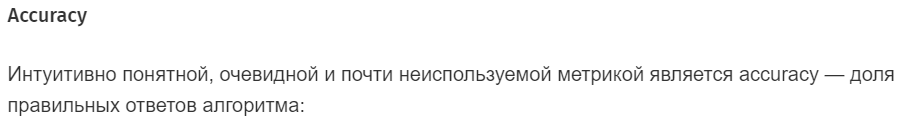
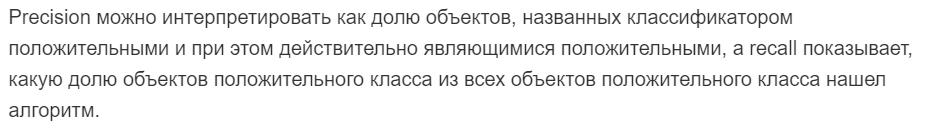

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
            Матрица ошибок.

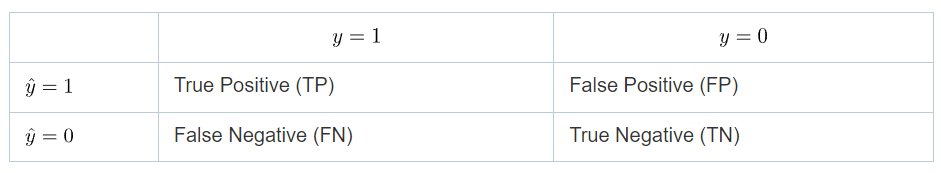

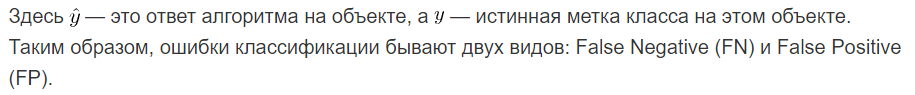

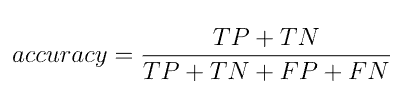

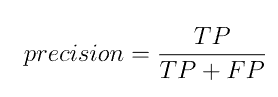

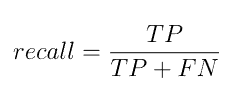

In [158]:
accuracy_test = accuracy_score(target_test, test_predictions)
precision_test = precision_score(target_test, test_predictions)
recall_test = recall_score(target_test, test_predictions)
print('Accuracy:', accuracy_test)
print('Precision:', precision_test)
print('Recall:', recall_test)

Accuracy: 0.7991718426501035
Precision: 0.7865168539325843
Recall: 0.47297297297297297


<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
            Показатель F1 можно интерпретировать как среднее гармоническое значение точности и полноты, где показатель F1 достигает своего наилучшего значения при 1, а худшего — при 0.  
            
            
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [159]:
f_index = f1_score(target_test, test_predictions)
print('Сбалансированный F-показатель', f_index)

Сбалансированный F-показатель 0.5907172995780591


<font size="4"><b>Вывод проверка адекватности</b></font>

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
            Проверив на адеватность модель, можно сделать вывод, что модель получилось адекватной, но не самого лучшего качества. Доля правильных ответов подходит для решения нашей задачи(по условию), точность модели не самая лучшая. Сбалансированный показатель чуть выше среднего.



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:


Илья, тобой решено проверить модель на адекватность "подгрузив" несколько других метрик качества. Да, в этом резон есть, например нам важно было качество предсказания какого-то одного класса, тогда да, мы бы проверяли на метриках, которые учитывают это и получили бы более адекватные оценки.   

В данном случаи мы проверяем модель на адекватность сравнивая ее с наивным прогнозом (простой "угадалкой" или прогноз одного и того же класса). Не забудь у нас дисбаланс классов в таргете. 




При проверке на адекватность модели, рекомендую ознакомиться с [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей


In [167]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(features_train, target_train)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(features_train)
dummy_clf.score(features_train, target_train)

0.6936416184971098

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
    Оно? Выглядит вполне адекватно, если я сделала все верно, наш результат получился даже лучше, чем предполагемый.  
    Проверил на обучающей, валидационной и тестовой, на всех вариант отличается тысячными.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет:

Цифры полученная верная, но правильно ли ты её трактуешь?!
    
    
Тут логика такая - у нас есть данные и мы видим что доля нулей в таргете около 69%, это значит что мы не проводя никакого анализа, моделирования итп итд, можем постоянно предсказывать 0 и получить точность около 69%. Вот эту accuracy в 69% мы и должны побить, иначе окажется что наша модель не лучше наивного прогноза самого частого класса.
      
    
С   DummyClassifier это выглядит  так:
    
    DummyClassifier(strategy='most_frequent', random_state=1)  
задаем константную модель, которая будет предсказывать по most_frequent - самый частый класс
    
    .fit(features_train, target_train)
тут модель смотри на самый частый класс в  target_train - типо "обучение"
    
    .predict(features_test)
    .score(features_test, target_test)
проогнозирует везде самый частый класс в features_test и считает score
    
Получаем тот же результат: acc около 69%.    



Сравниваем с accuracy нашей модели и делаем вывод


## Вывод по проекту "Рекомендация тарифов"

<div style="border:solid steelblue 3px; padding: 20px">
        <font size="4", color = "black">
            1. В ходе изучения данных был выбран целевой параметр, который нужно будет предсказать модели, это столбец "is_ultra" - использование тарифа "Смарт"-0 или "Ультра"-1.   
            2. В пункте разделения данных на три выборки, данные были поделены 60/25/15 на обучающие, валидационные и тестовые соответсвенно.  
            3. В ходе исследования модели были рассмотрены три модели: DecisionTreeClassifier, RandomForestClassifier, LogisticRegression. Лучше всего себя показала модель DecisionTreeClassifier = 0.809 (доля правильных ответов). Так же в этом пункте работы были рассмотренны различные гиперпараметры моделей, изменение гиперпараметров значительно не повлияело на долю правильных ответом модели.  
            4. Модель проверена на тестовой выборке и показала себя чуть лучше на 1.1%! Модель удовлетворяет первоначальному условию (доля правильных ответов выше чем 0.75).  
            5. При проверки на адекватность модель показала средний результат, модель нельзя назвать идеальной, но и неприменимой назвать нельзя.
         



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




Илья, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют
    
    
    
    
Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить): 




- обрати внимание на проверку сбалансированность классов в таргете в разделе EDA
- использовать stratify
- добавить график метрики    
- как можно улучшить результаты 



Посылаю на вторую итерацию, чтобы посмотреть твое решение бонусного задания (если захочешь доделать) и ответить на вопросы если они появятся



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Мспользованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.



Отличная работа Илья. Желаю успехов в дальнейшей учебе!





</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
